In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from operator import attrgetter

In [2]:
# Загрузка данных
def load_data():
    customers = pd.read_csv("./clean_data/customers.csv")
    geolocation = pd.read_csv("./clean_data/geolocation.csv")
    order_pay = pd.read_csv("./clean_data/order_payments.csv")
    reviews = pd.read_csv("./clean_data/order_reviews.csv")
    orders = pd.read_csv("./clean_data/orders.csv")
    item = pd.read_csv("./clean_data/orders_items.csv")
    category_name = pd.read_csv(
        "./clean_data/product_category_name_translation.csv")
    products = pd.read_csv("./clean_data/products.csv")
    sellers = pd.read_csv("./clean_data/sellers.csv")
    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers

In [3]:
# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df

In [4]:
# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]

In [5]:
# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [6]:
data = main_pipeline()

In [7]:
data.head()

order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-09-26 22:17:05  2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34  2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22  2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   
4    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10-27 16:46:05   
2          2017-10-17 15:42:42           2017-10-24 20:17:44   
3          2017-09-04 22:03:06           2017-09-08 16:26:55   
4          2017-09-04 22:03:06           2017-09-08 16:26:55   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-30 00:00:00            1.0   
1           2017-11-09 00:00:00            1.0   
2           2017-11-06 00:00:00            1.0   
3           2017-09-27 00:00:00            1.0   
4           2017-09-27 00:00:00            2.0   

                         product_id  ... product_height_cm product_width_cm  \
0  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
1  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
2  a2ff5a97bf95719e38ea2e3b4105bce8  ...              43.0             36.0   
3  08574b074924071f4e201e151b152b4e  ...              12.0             39.0   
4  08574b074924071f4e201e151b152b4e  ...              12.0             39.0   

                 customer_unique_id  customer_zip_code_prefix  \
0  3c7e305796add66698959fc7ad176f6b                   87502.0   
1  9de5797cddb92598755a0f76383ddbbb                   35490.0   
2  9915eb9f74b6c11aaf04833f65b00e93                   38600.0   
3  dce323533e45e74d215e0fe7fb114118                   24710.0   
4  dce323533e45e74d215e0fe7fb114118                   24710.0   

         customer_city customer_state  seller_zip_code_prefix  seller_city  \
0             umuarama             PR                  9080.0  santo andre   
1  entre rios de minas             MG                  9080.0  santo andre   
2             paracatu             MG                  9080.0  santo andre   
3          sao goncalo             RJ                 29156.0    cariacica   
4          sao goncalo             RJ                 29156.0    cariacica   

  seller_state  product_category_name_english  
0           SP               small_appliances  
1           SP               small_appliances  
2           SP               small_appliances  
3           ES                   garden_tools  
4           ES                   garden_tools  

[5 rows x 38 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118686 entries, 0 to 118810
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115706 non-null  object 
 1   customer_id                    118686 non-null  object 
 2   order_status                   115706 non-null  object 
 3   order_purchase_timestamp       115706 non-null  object 
 4   order_approved_at              115706 non-null  object 
 5   order_delivered_carrier_date   115706 non-null  object 
 6   order_delivered_customer_date  115706 non-null  object 
 7   order_estimated_delivery_date  115706 non-null  object 
 8   order_item_id                  115706 non-null  float64
 9   product_id                     115706 non-null  object 
 10  seller_id                      115706 non-null  object 
 11  shipping_limit_date            115706 non-null  object 
 12  price                          1157

In [9]:
data.isna().sum()

order_id                         2980
customer_id                         0
order_status                     2980
order_purchase_timestamp         2980
order_approved_at                2980
order_delivered_carrier_date     2980
order_delivered_customer_date    2980
order_estimated_delivery_date    2980
order_item_id                    2980
product_id                       2980
seller_id                        2980
shipping_limit_date              2980
price                            2980
freight_value                    2980
payment_sequential               2983
payment_type                     2983
payment_installments             2983
payment_value                    2983
review_id                        3841
review_score                     3841
review_creation_date             3841
review_answer_timestamp          3841
product_category_name            4618
product_name_lenght              4618
product_description_lenght       4618
product_photos_qty               4618
product_weig

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(113193, 38)

In [14]:
#преобразуем дату в формат datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

#определим дату первого заказа для каждого клиента
data['cohort_month'] = data.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

#отдельная колонка: месяц покупки (для расчёта времени от когорты)
data['order_month'] = data['order_purchase_timestamp'].dt.to_period('M')

In [15]:
#cчитаем разницу между месяцем заказа и месяцем когорты (возраст когорты в месяцах)
data['cohort_index'] = (data['order_month'] - data['cohort_month']).apply(attrgetter('n'))

In [16]:
#создаём когортную таблицу
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')

#нормализуем по первому месяцу когорты (retention)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

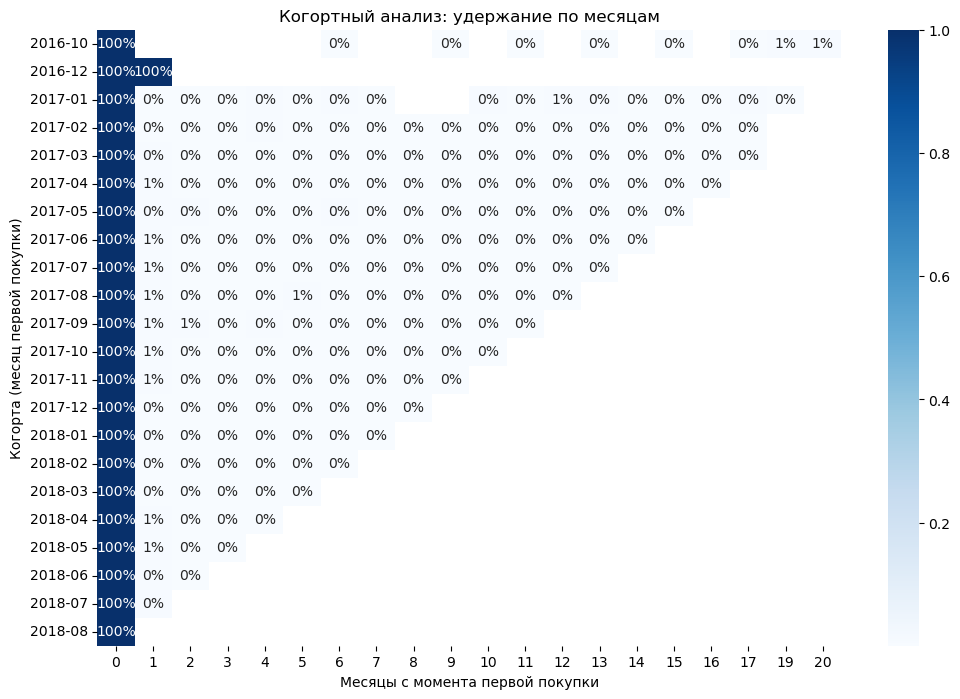

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Когортный анализ: удержание по месяцам')
plt.ylabel('Когорта (месяц первой покупки)')
plt.xlabel('Месяцы с момента первой покупки')
plt.savefig('./product/cohort/cohort_churn_by_month.png')
plt.show()

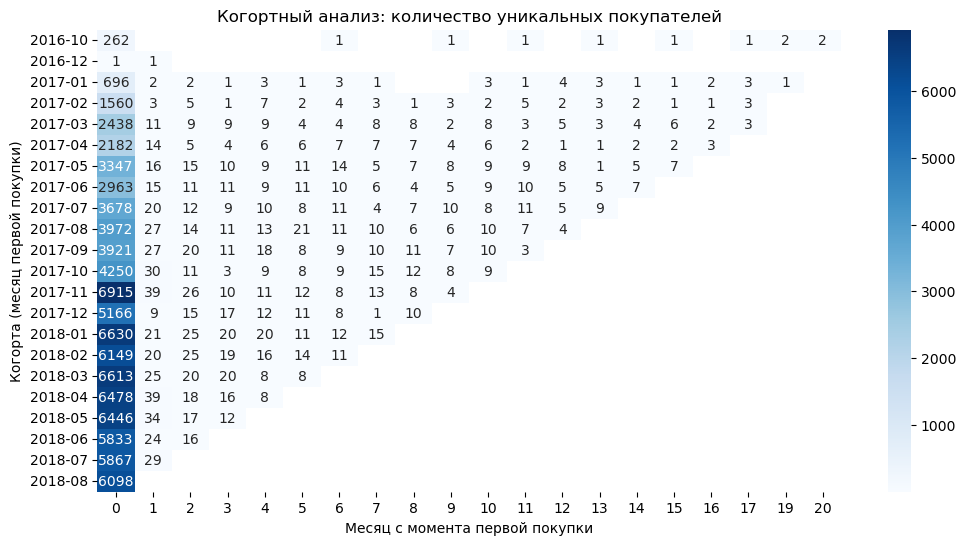

In [21]:
#cтроим когортную таблицу по количеству пользователей
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].nunique().unstack(1)

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_data, annot=True, fmt='g', cmap='Blues')
plt.title('Когортный анализ: количество уникальных покупателей')
plt.ylabel('Когорта (месяц первой покупки)')
plt.xlabel('Месяц с момента первой покупки')
plt.savefig('./product/cohort/cohort_unique_users.png')
plt.show()

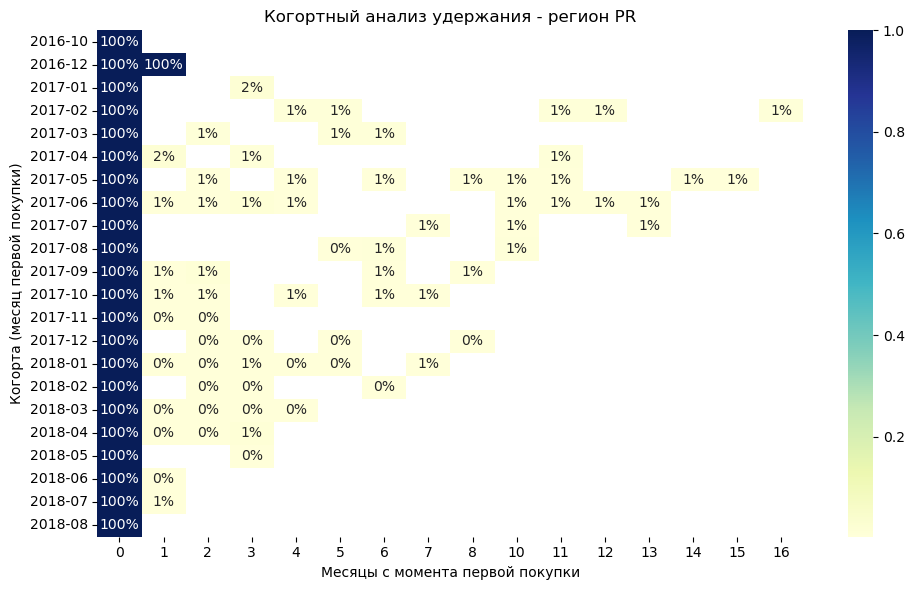

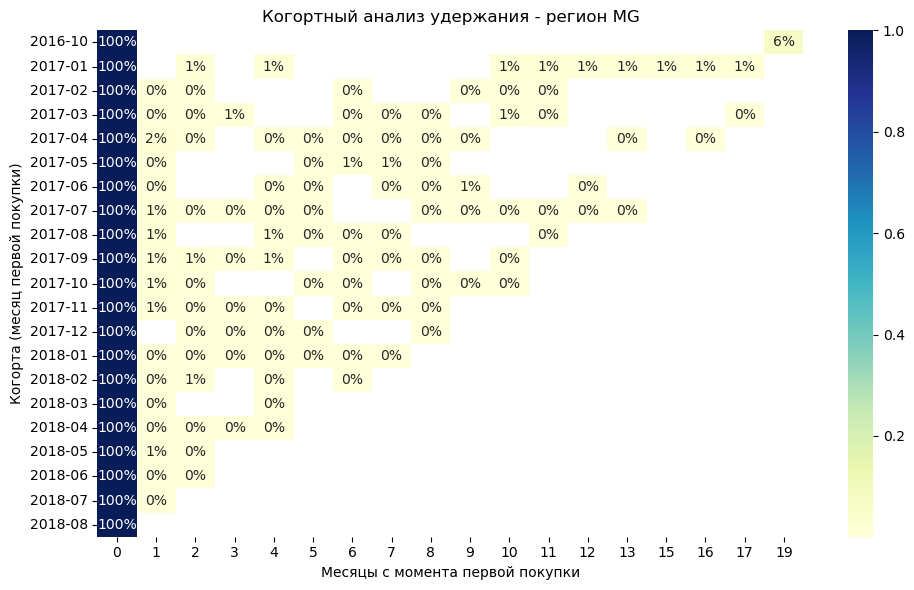

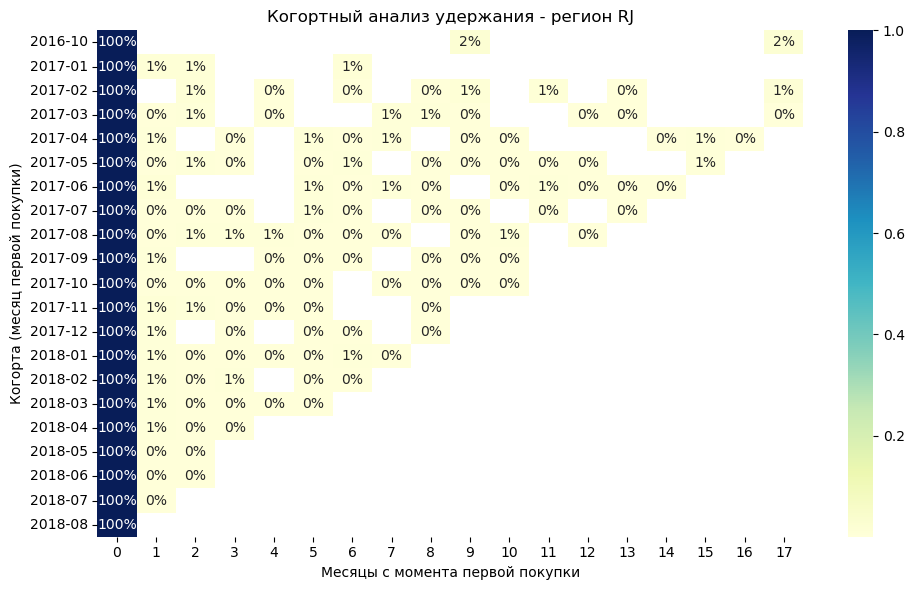

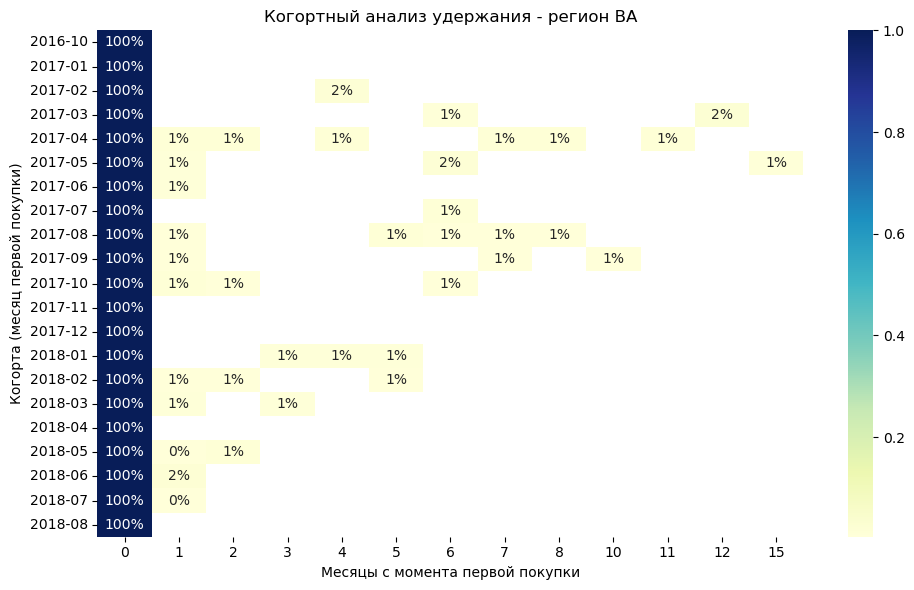

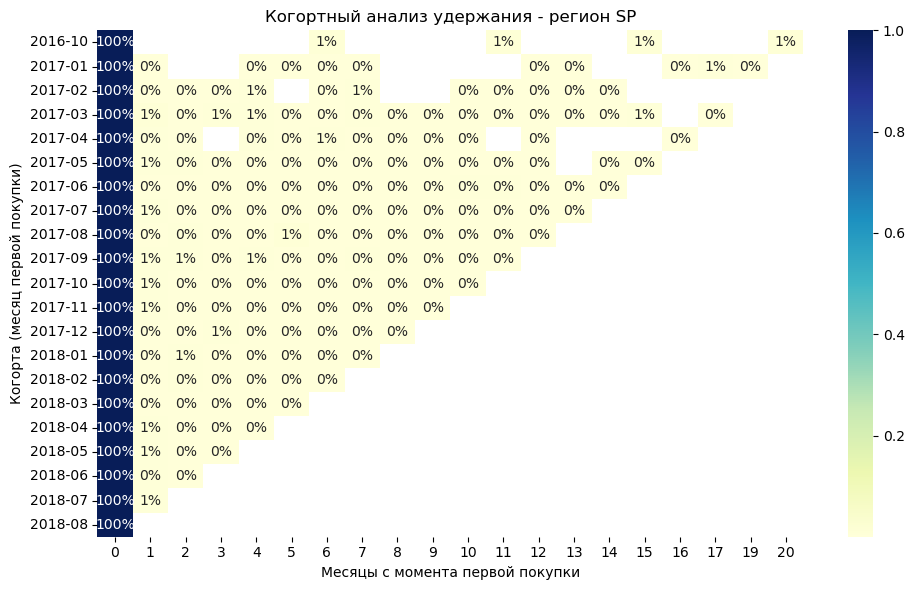

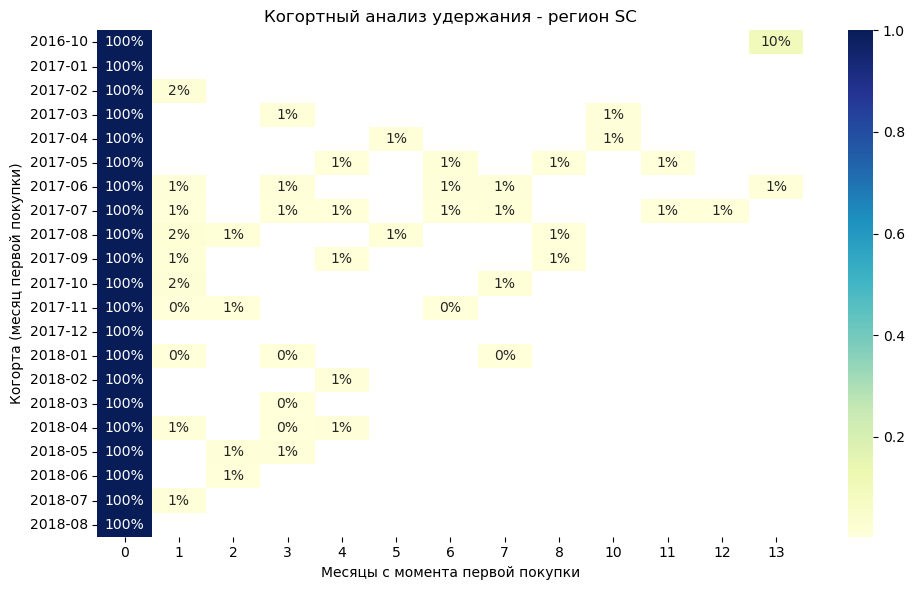

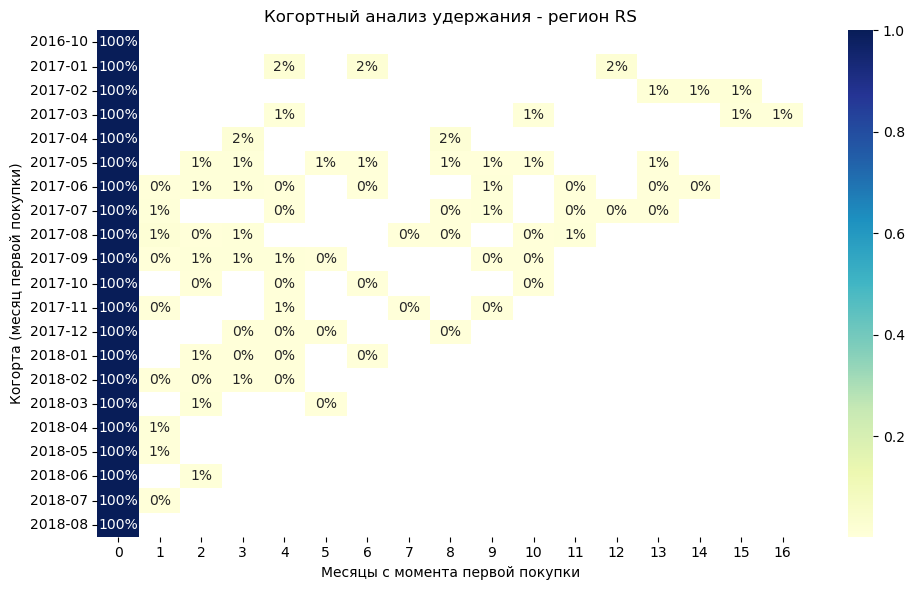

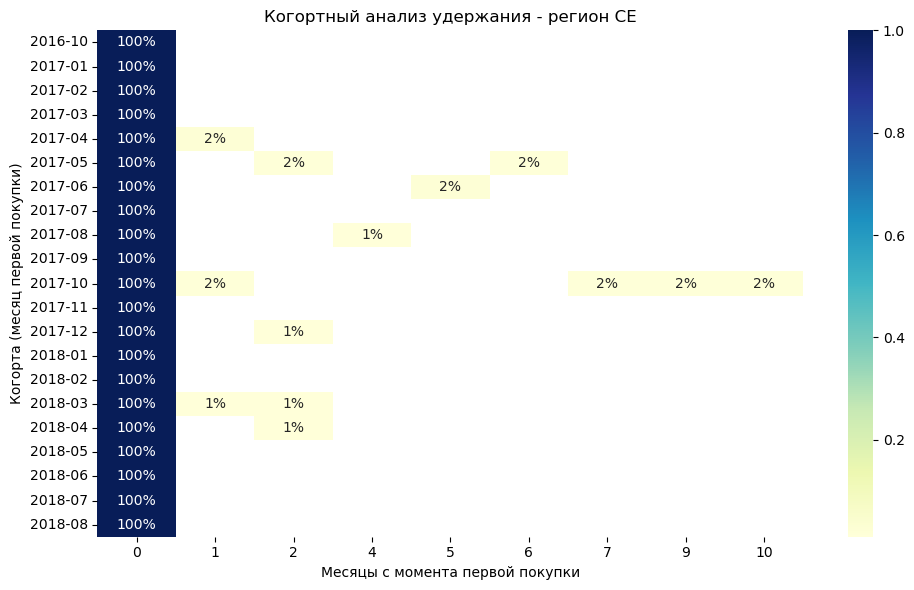

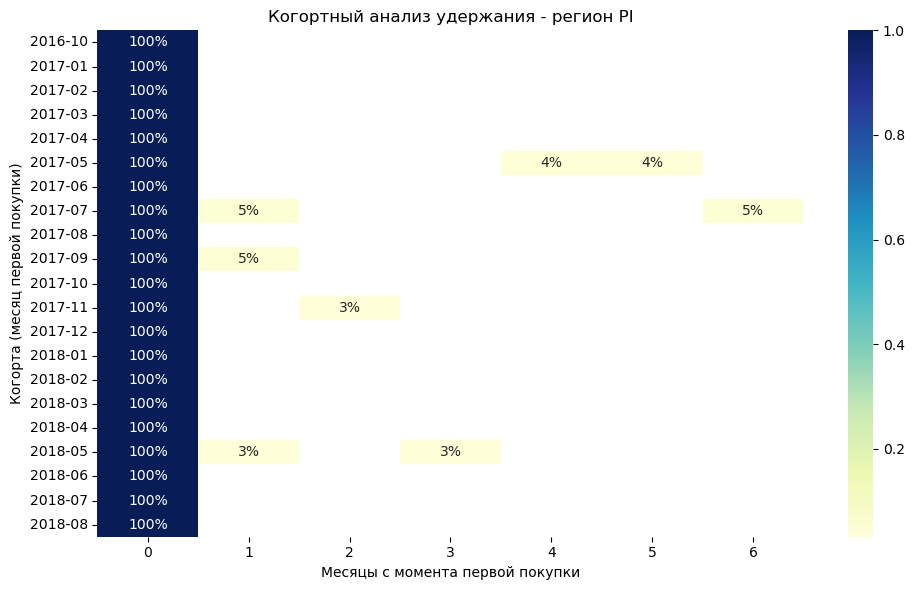

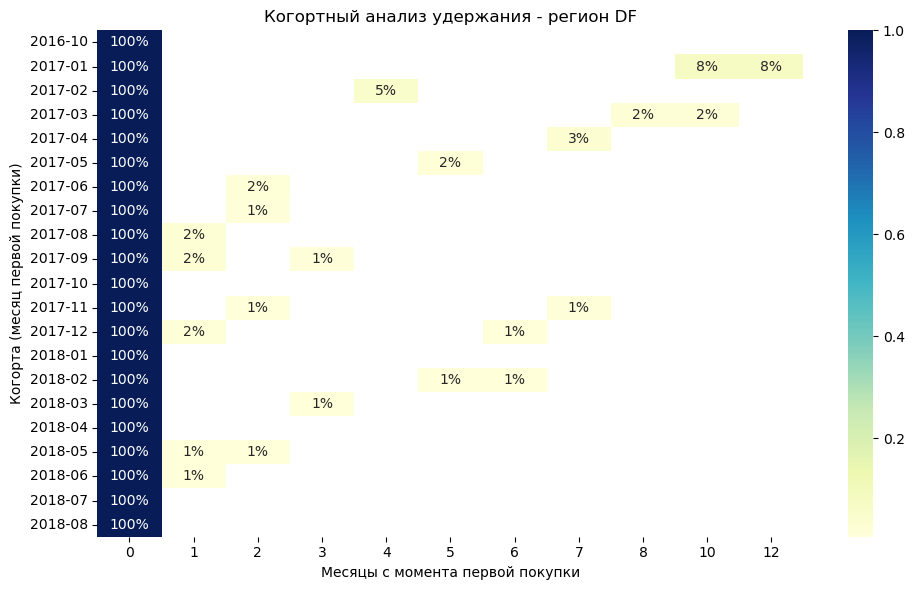

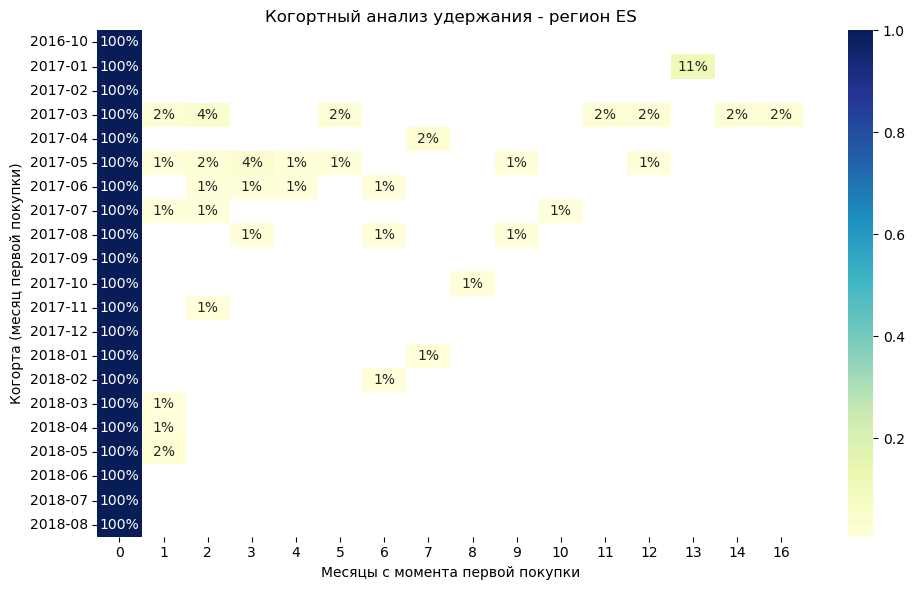

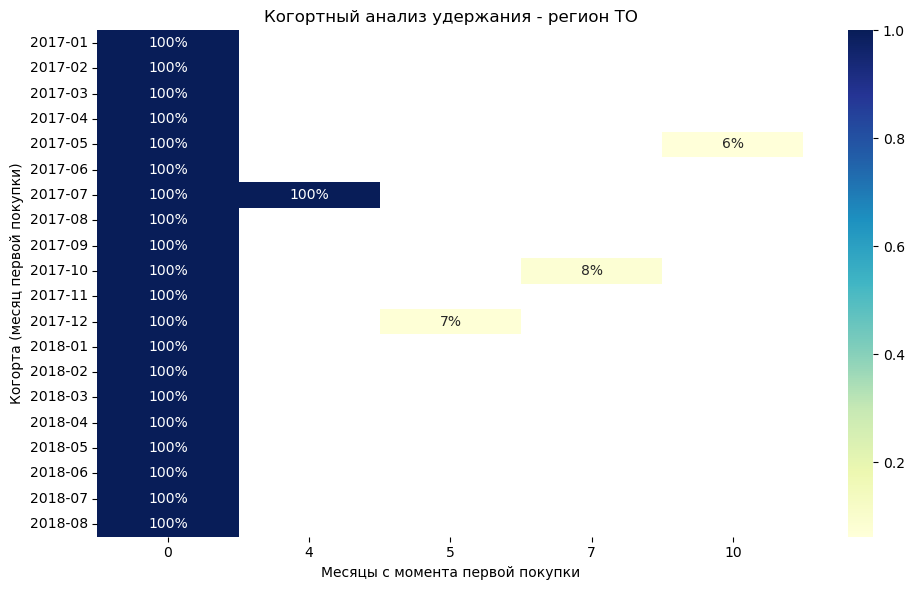

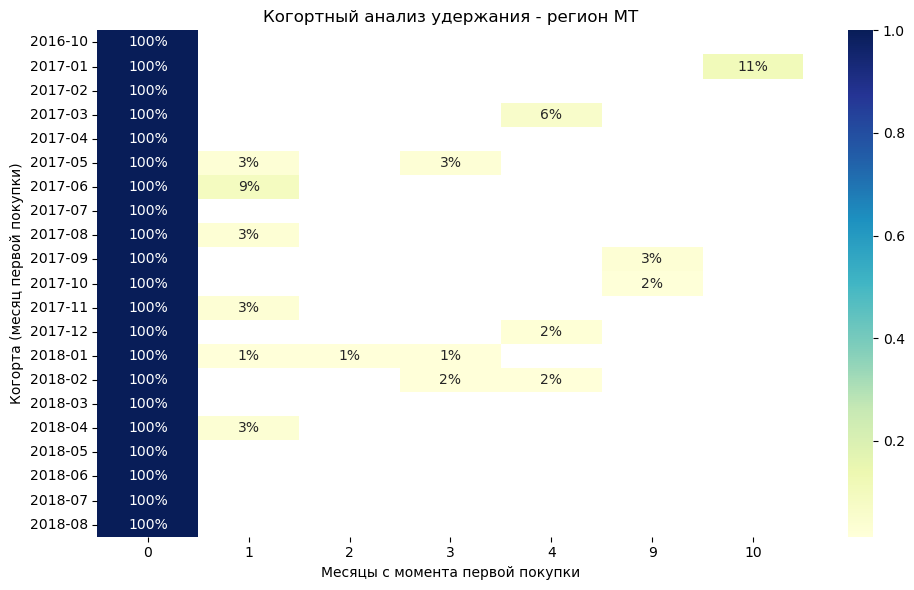

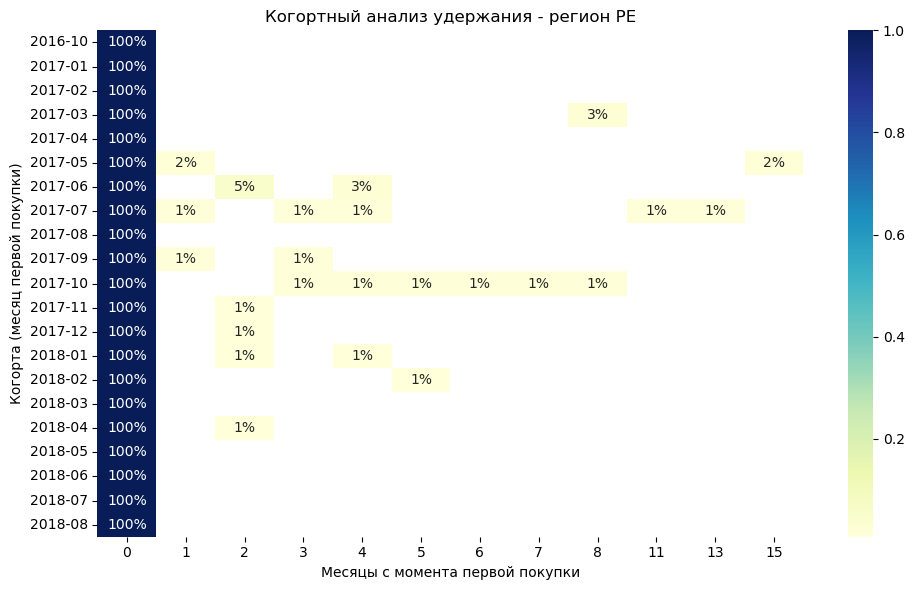

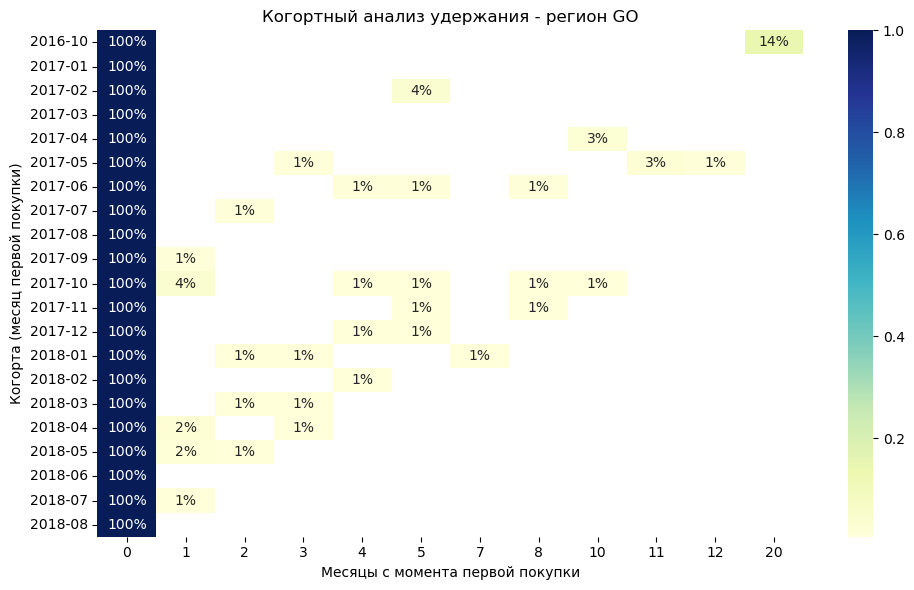

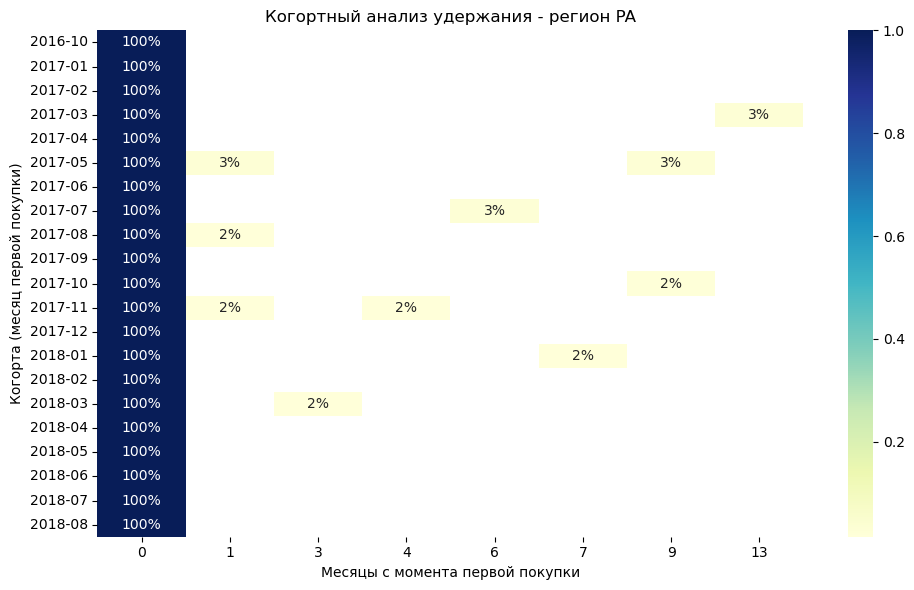

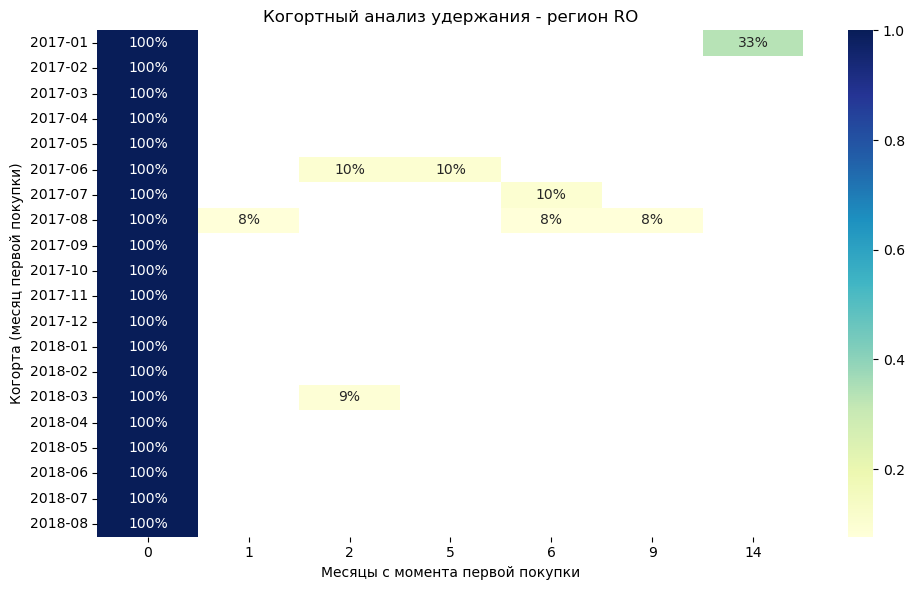

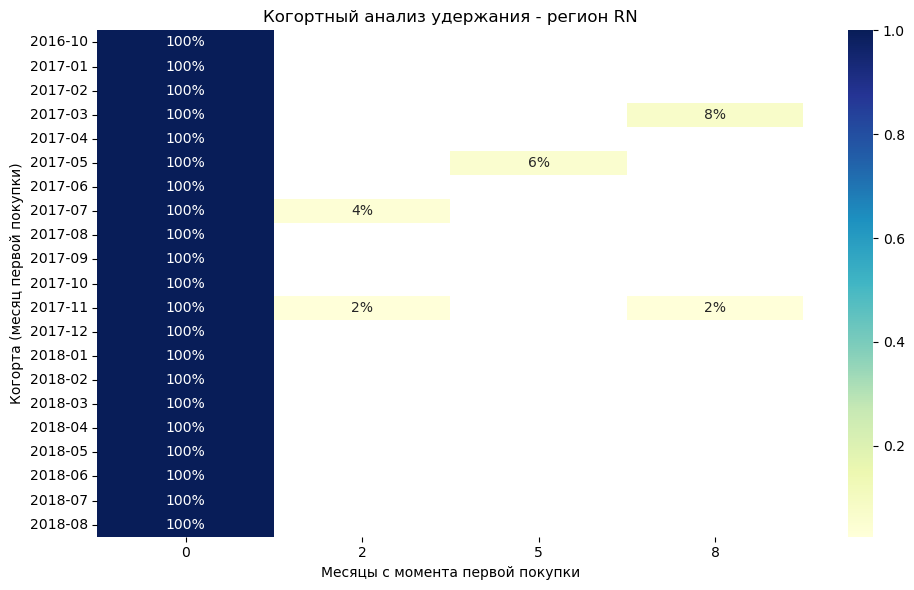

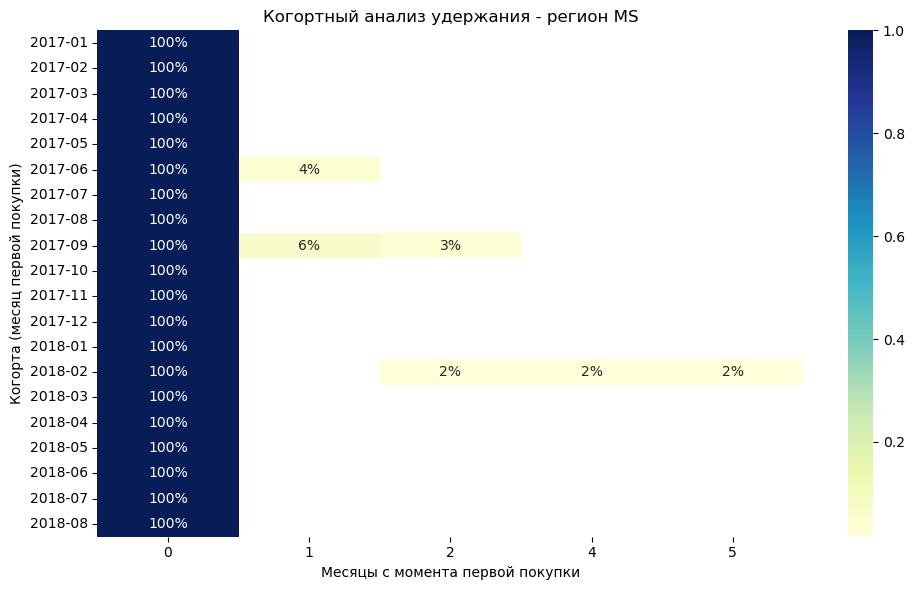

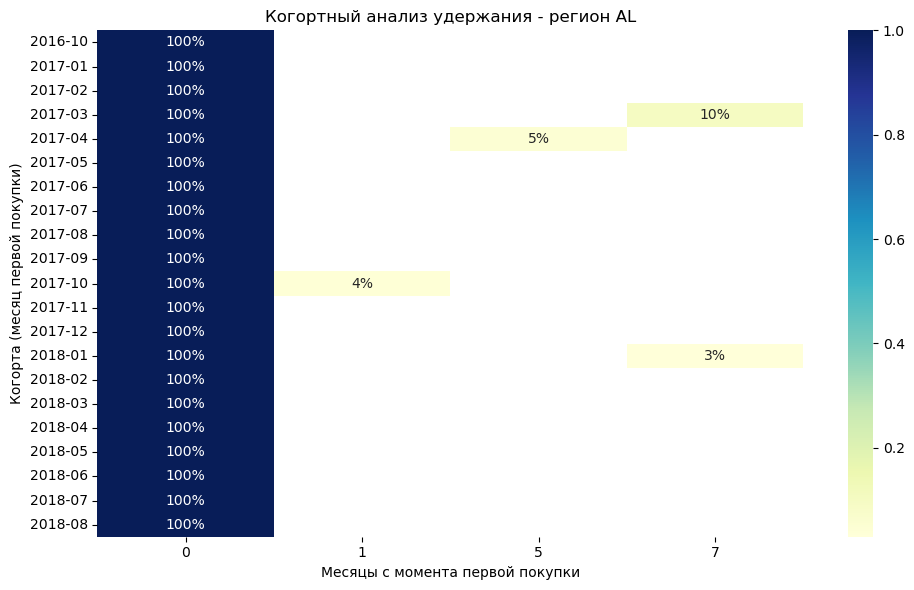

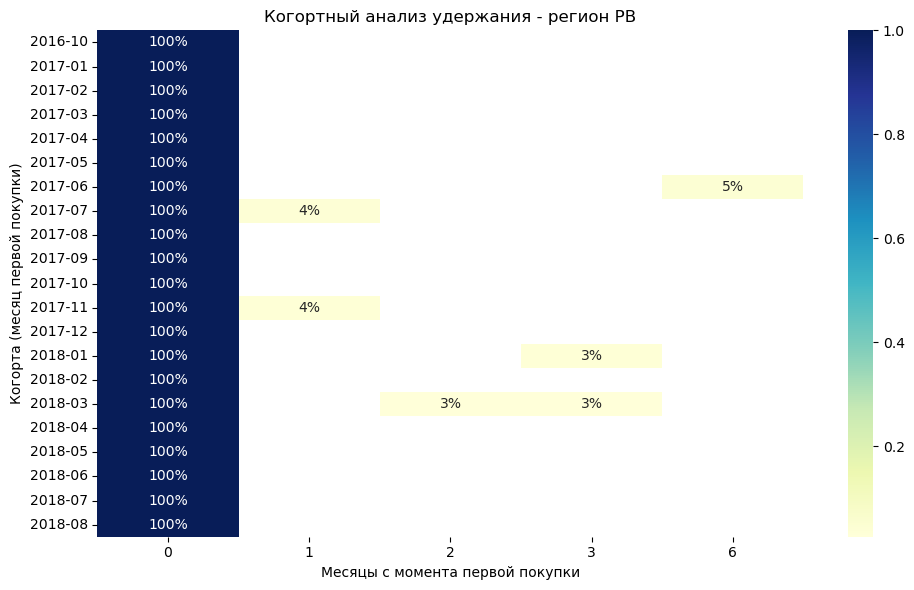

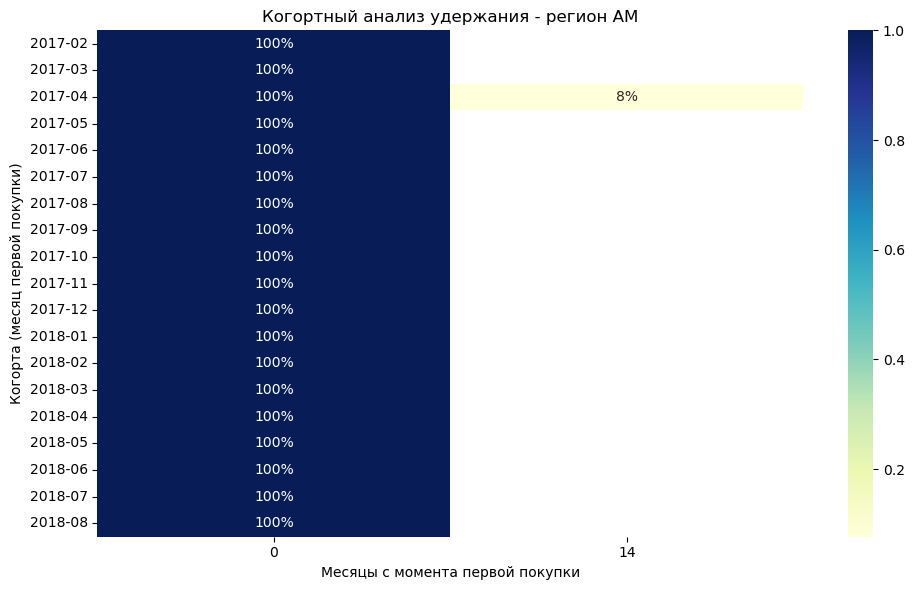

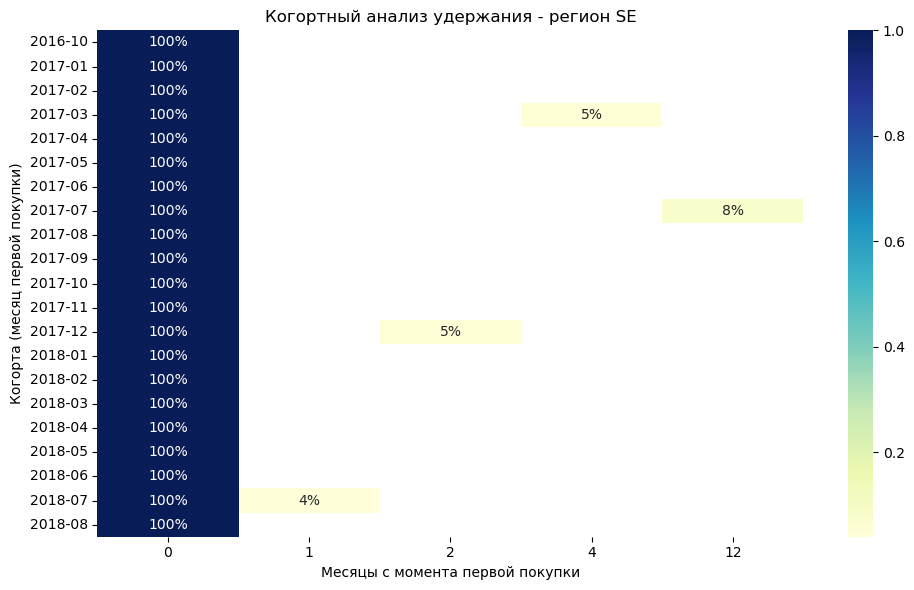

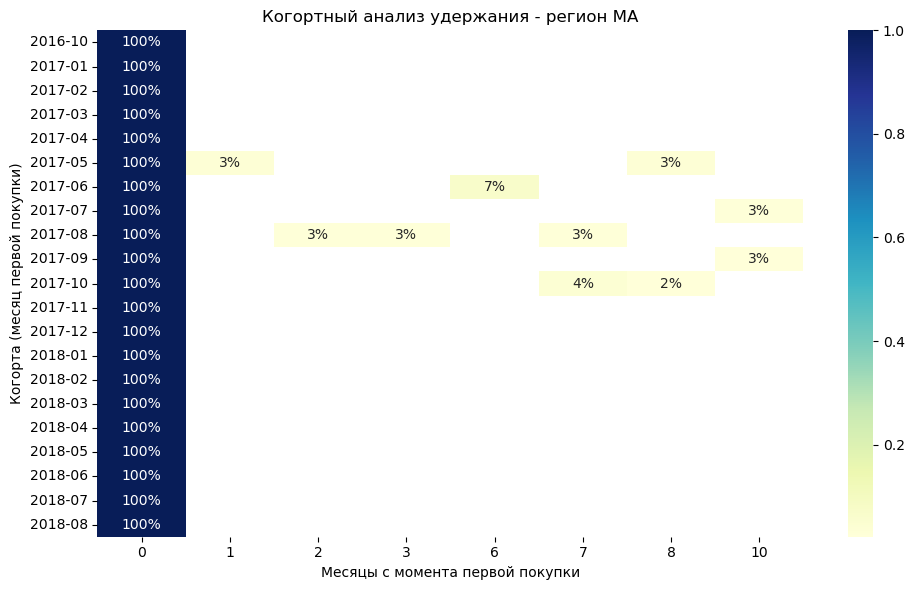

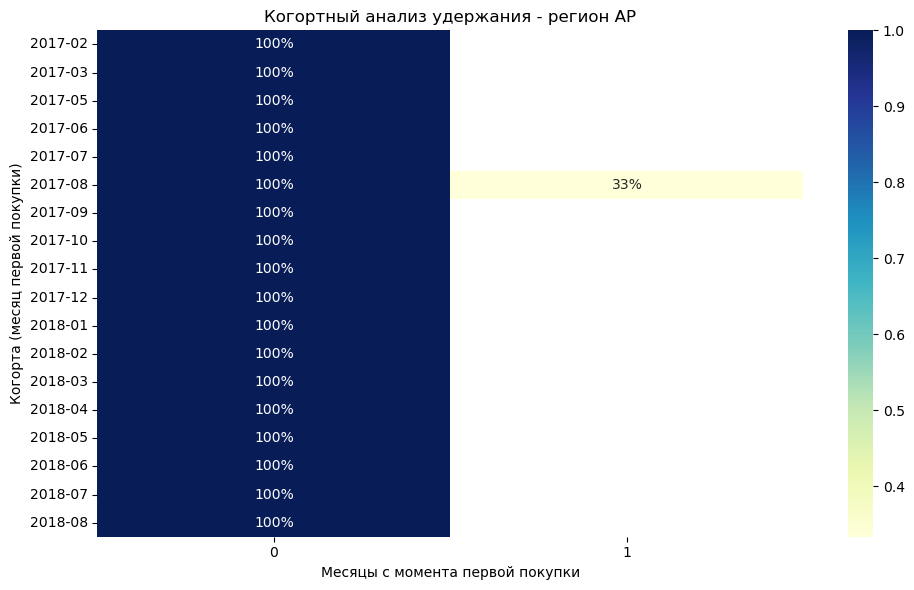

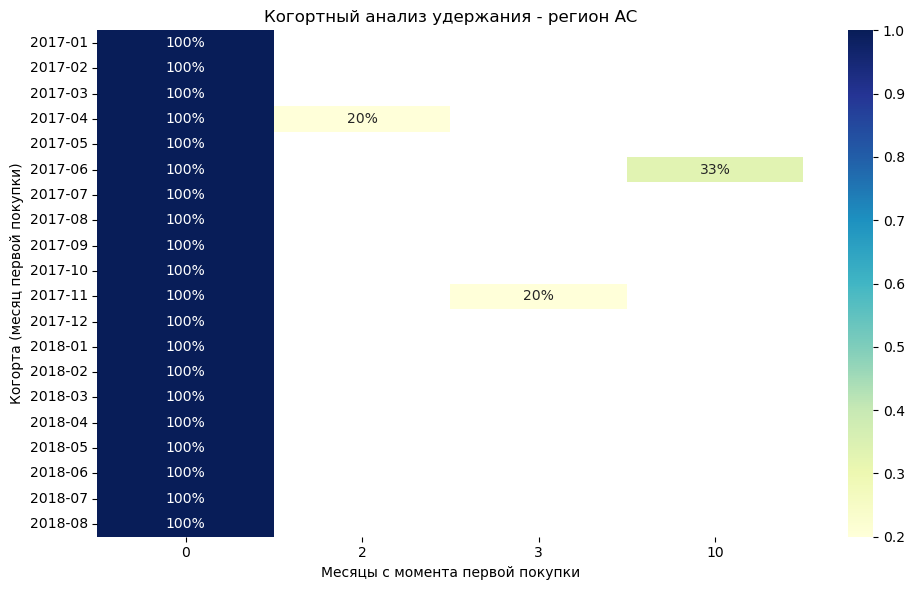

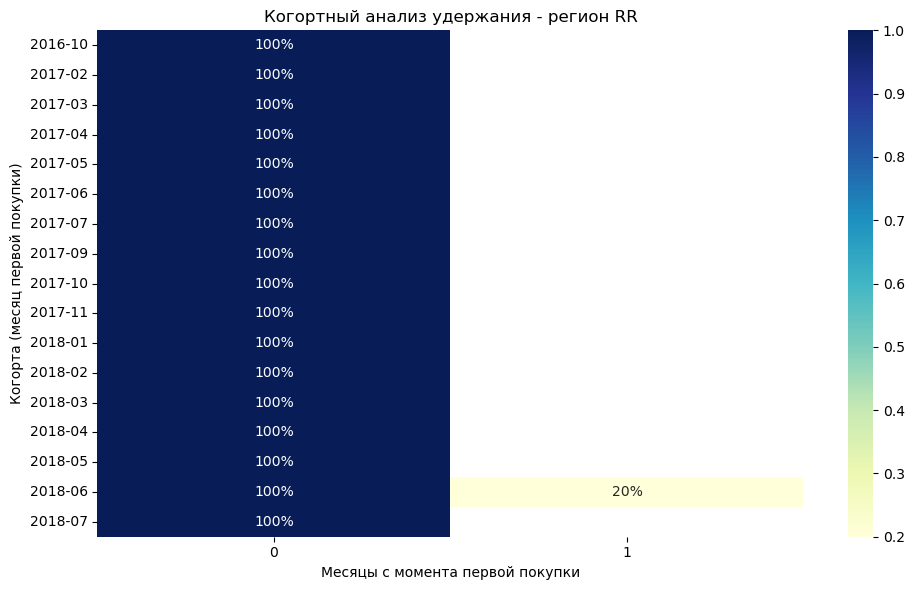

In [23]:
#группируем пользователей по региону, когортному месяцу и индексу
regional_cohort = data.groupby(['customer_state', 'cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()

#теперь по одному региону строим сводную таблицу
state_list = data['customer_state'].unique()

for state in state_list:
    cohort_state = regional_cohort[regional_cohort['customer_state'] == state]
    cohort_pivot = cohort_state.pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')

    if cohort_pivot.empty or cohort_pivot.shape[1] < 2:
        continue

    #рассчитаем retention (%)
    cohort_size = cohort_pivot.iloc[:, 0]
    retention = cohort_pivot.divide(cohort_size, axis=0)

    #построим тепловую карту
    plt.figure(figsize=(10, 6))
    sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
    plt.title(f'Когортный анализ удержания - регион {state}')
    plt.ylabel('Когорта (месяц первой покупки)')
    plt.xlabel('Месяцы с момента первой покупки')
    plt.tight_layout()
    plt.savefig(f'./product/cohort/region/cohort_churn_by_region_{state}.png')
    plt.show()

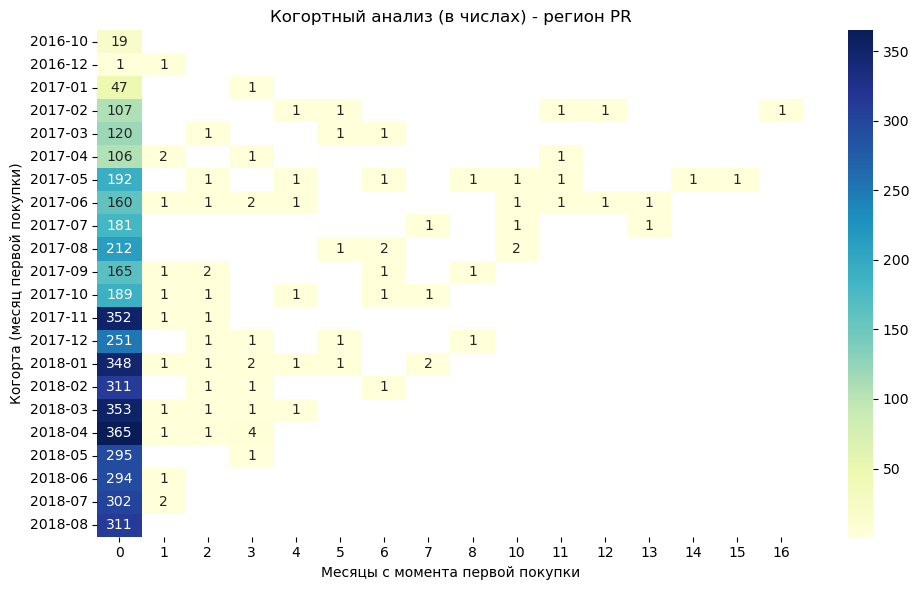

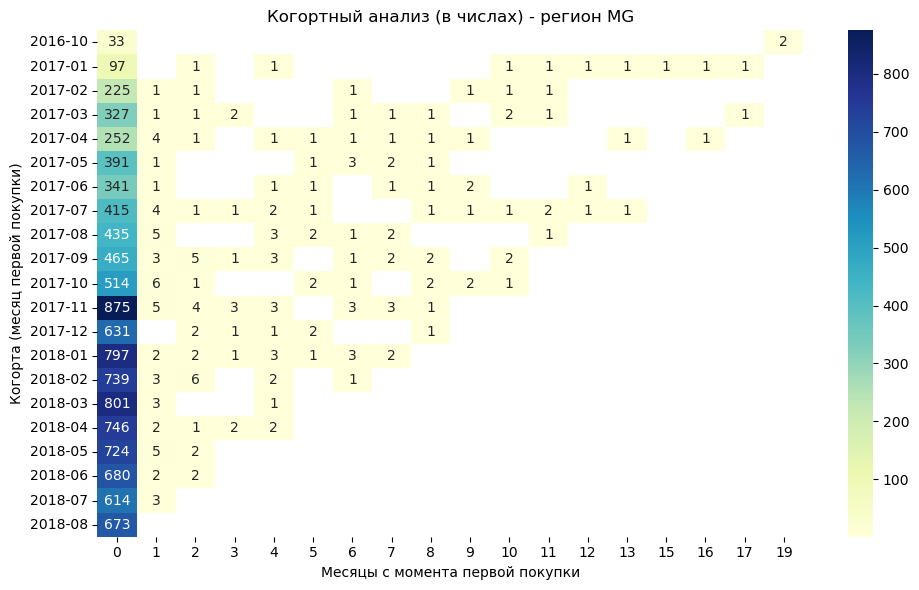

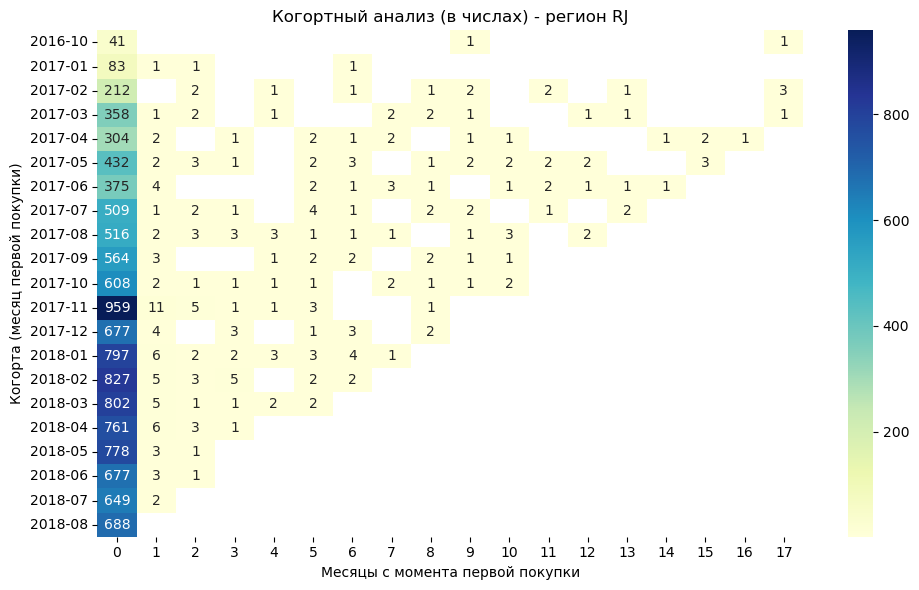

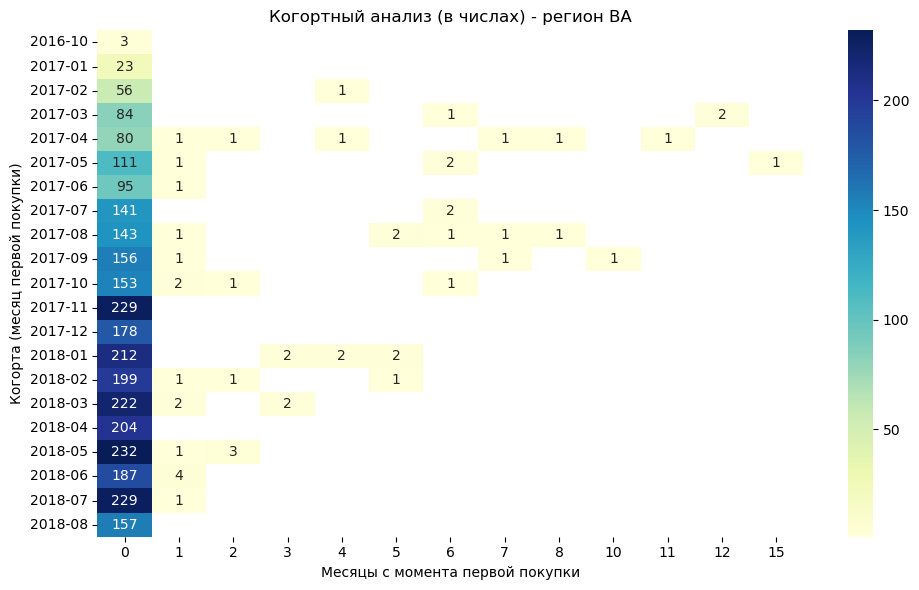

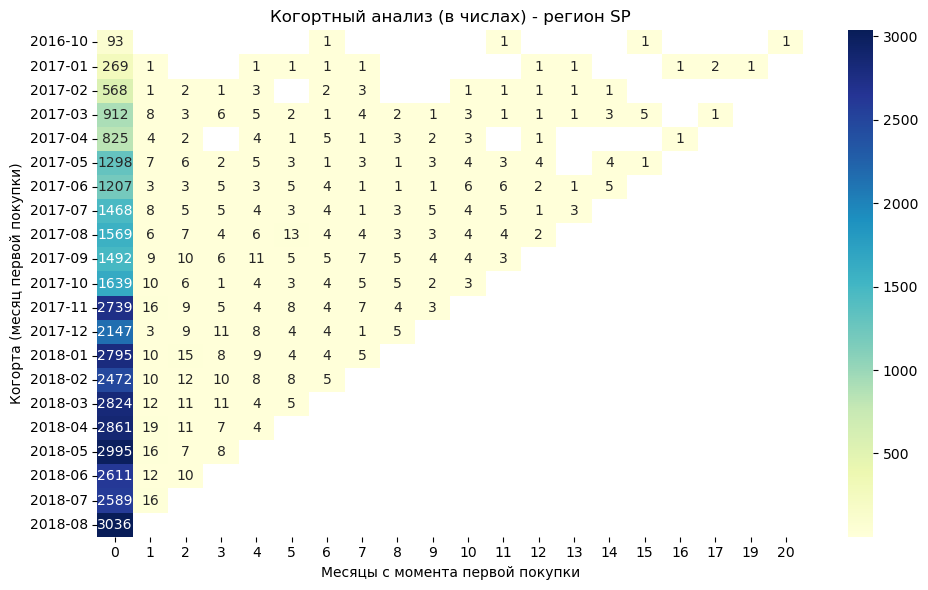

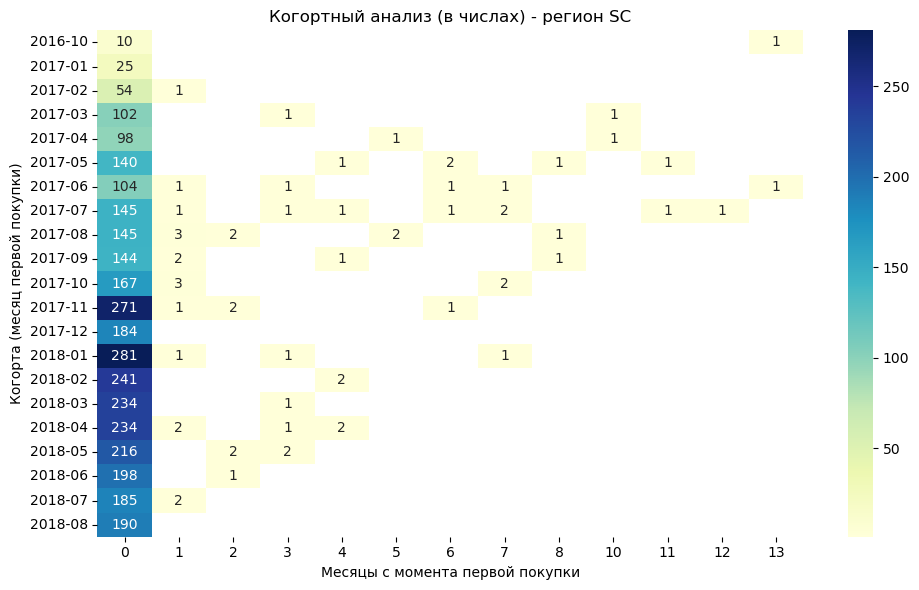

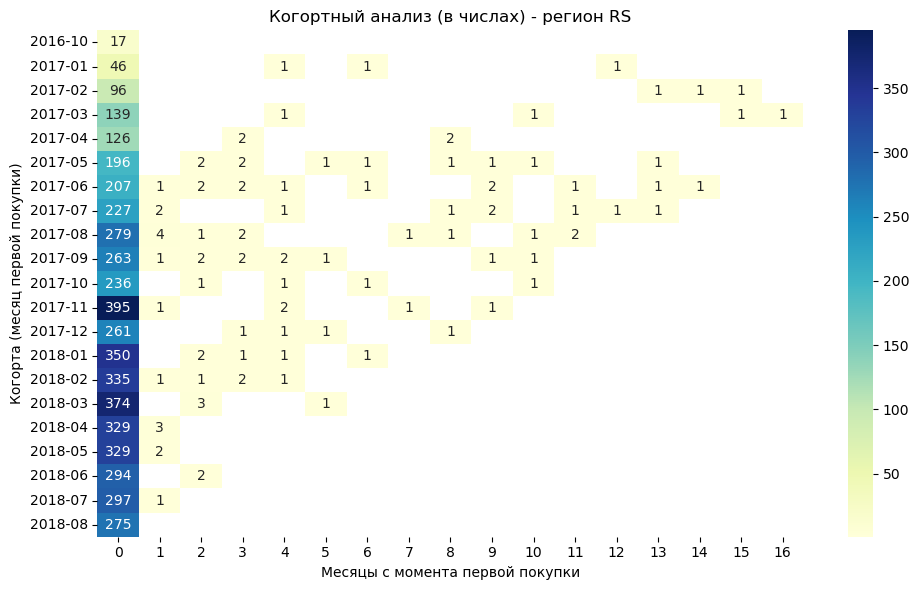

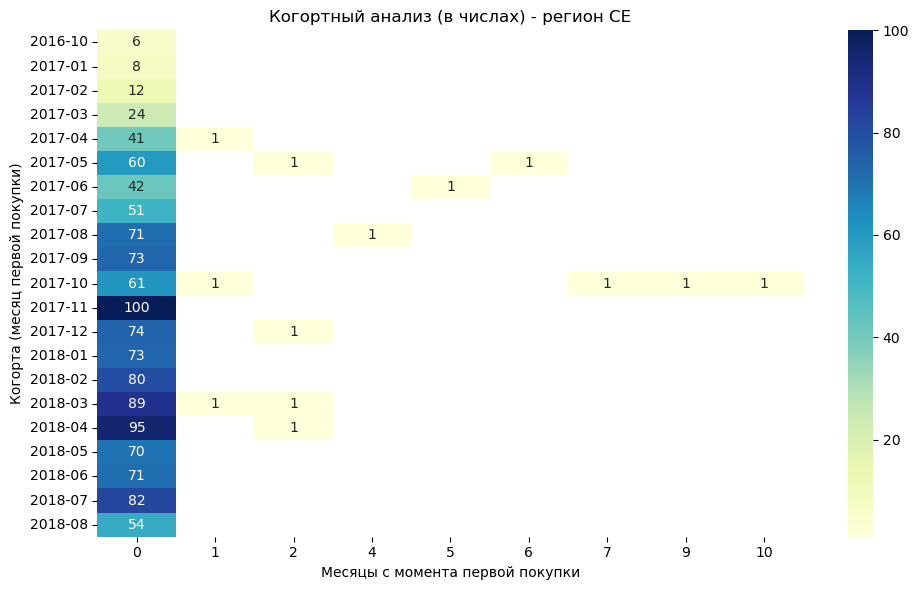

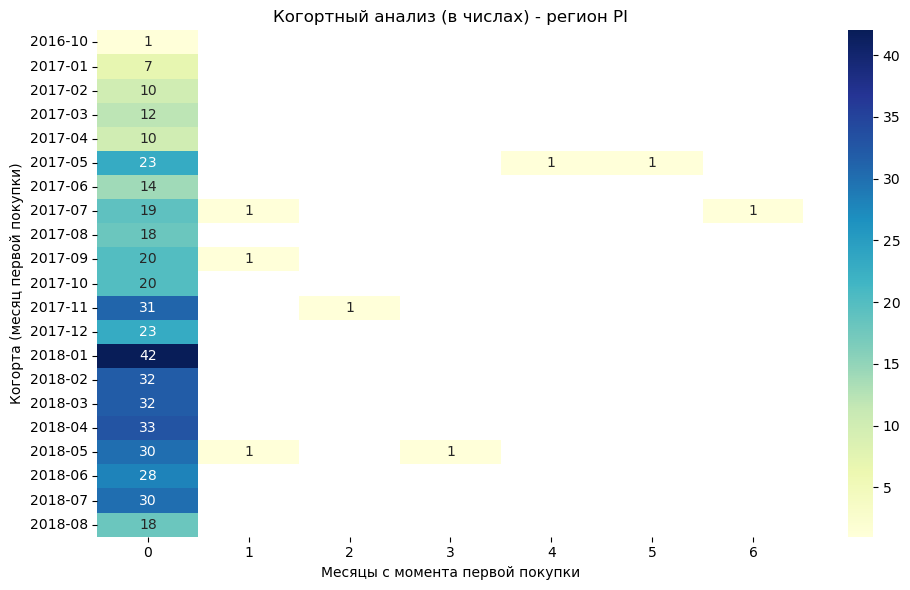

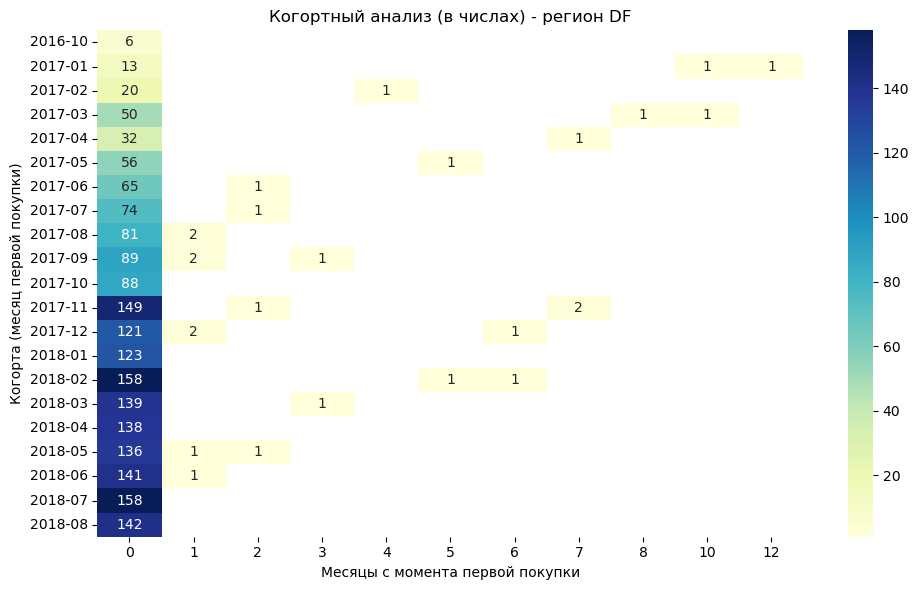

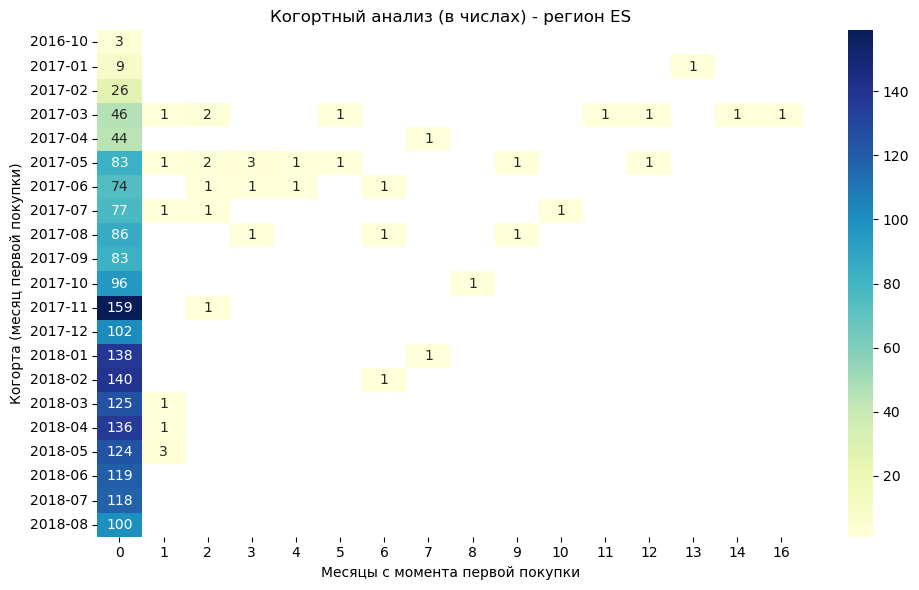

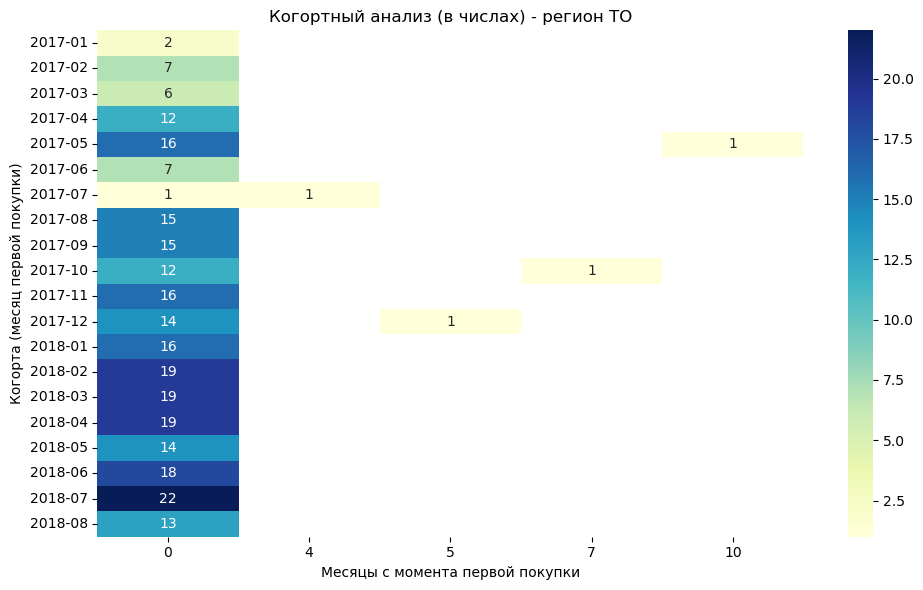

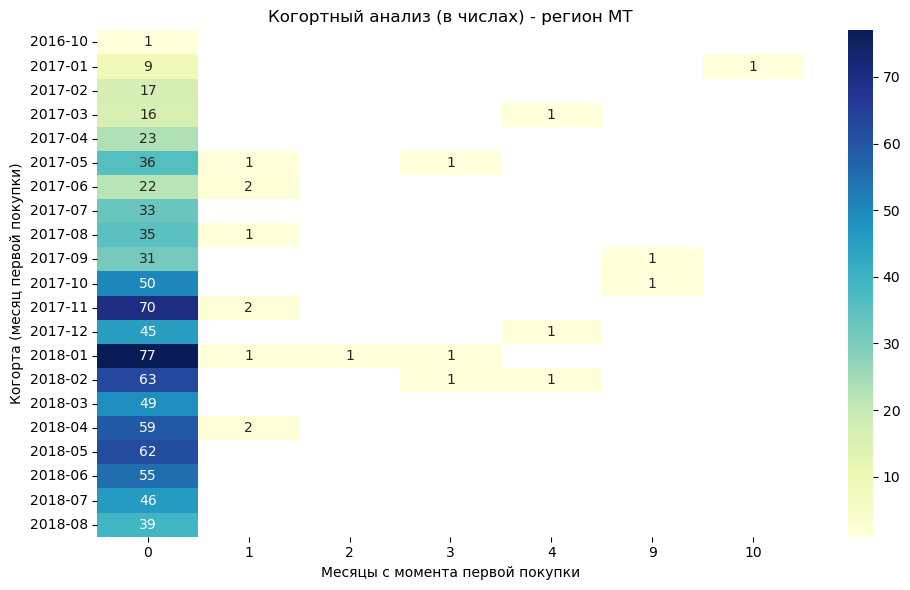

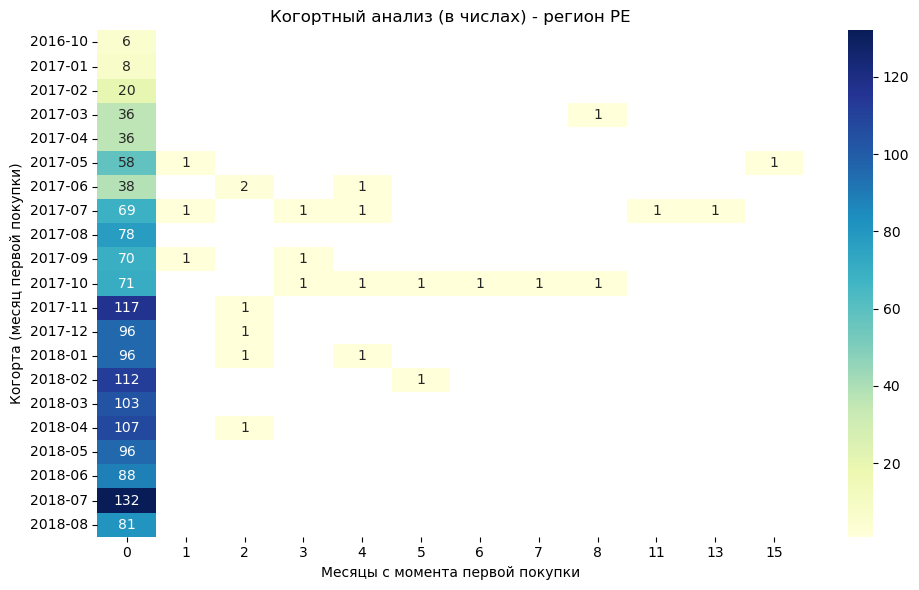

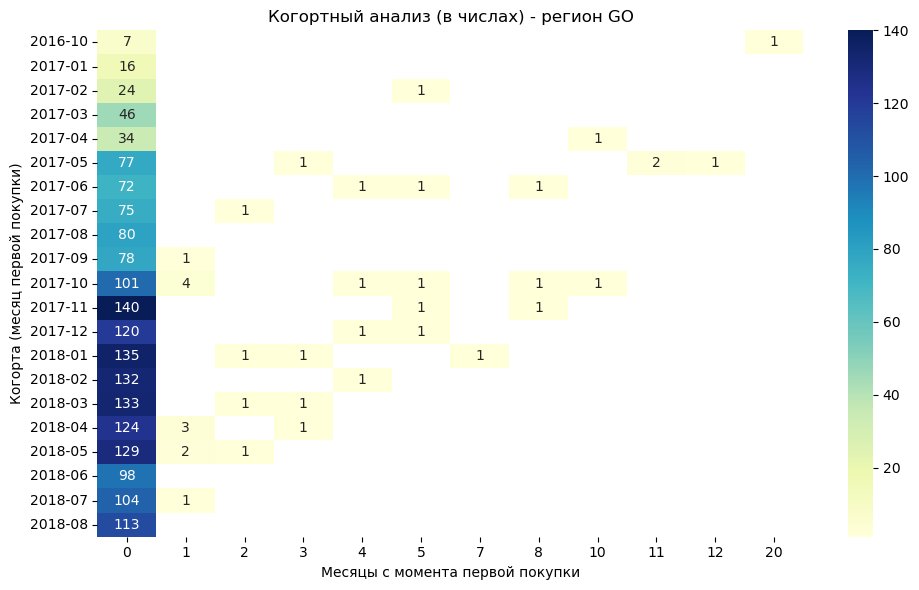

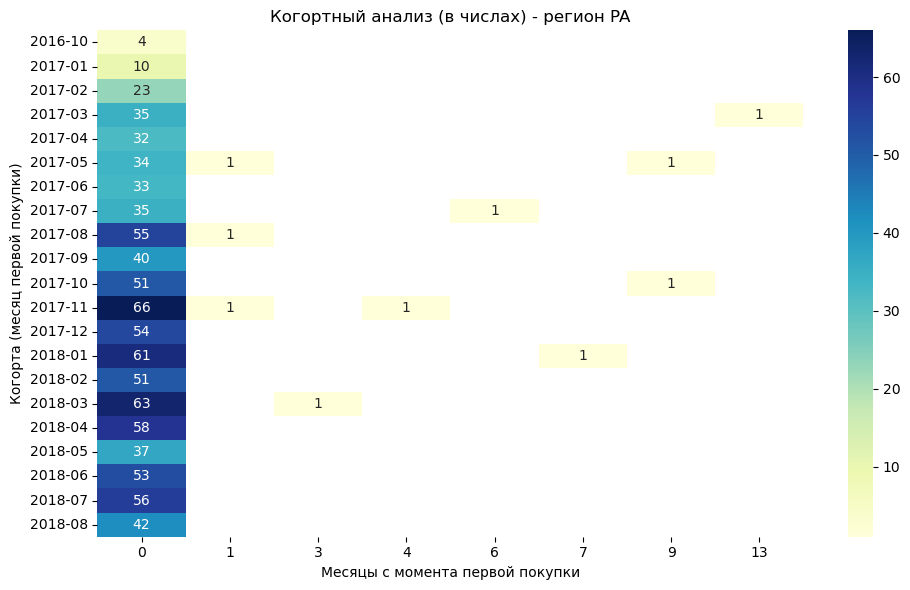

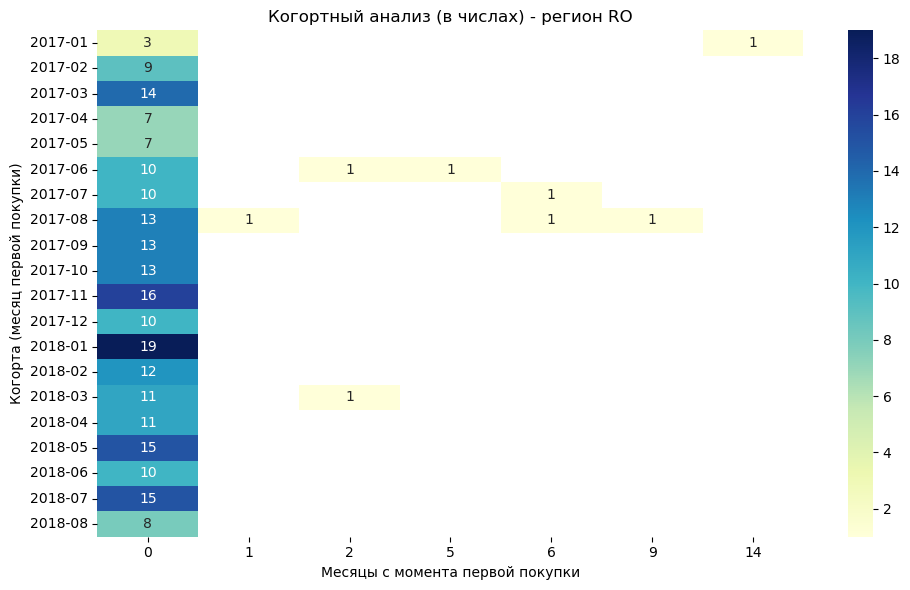

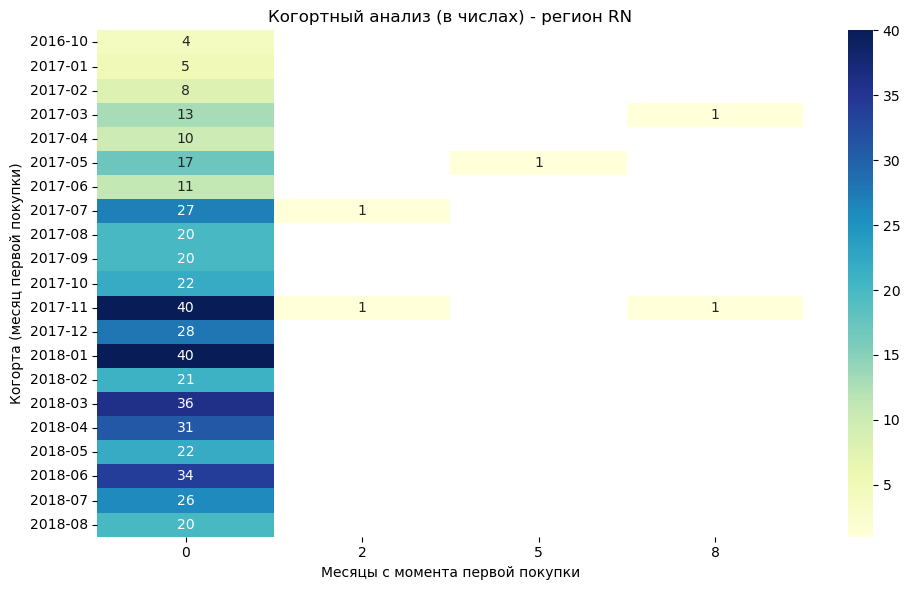

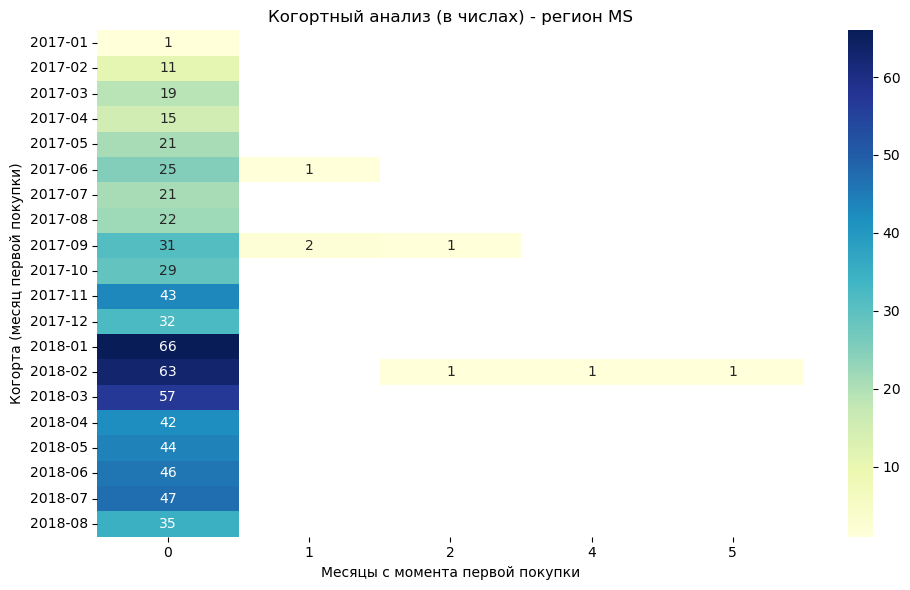

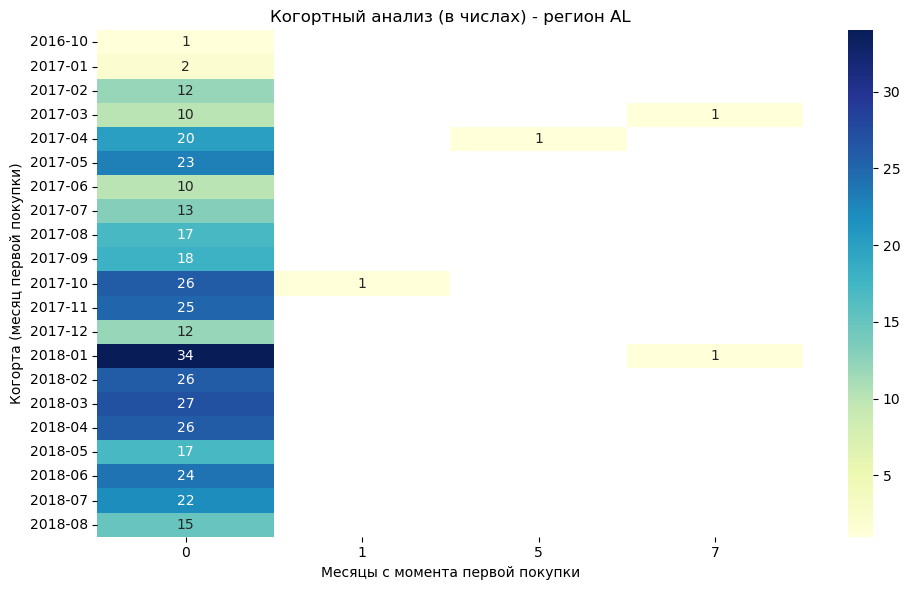

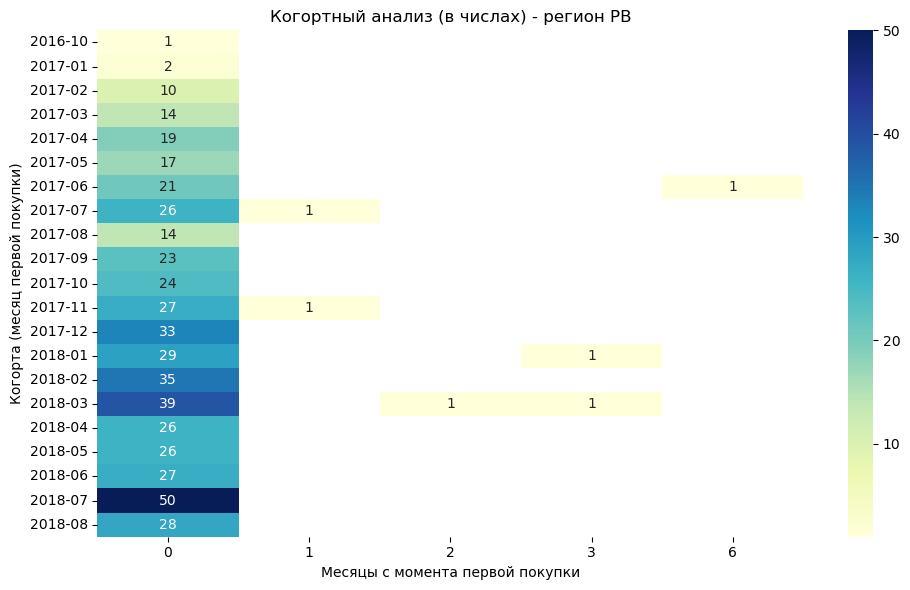

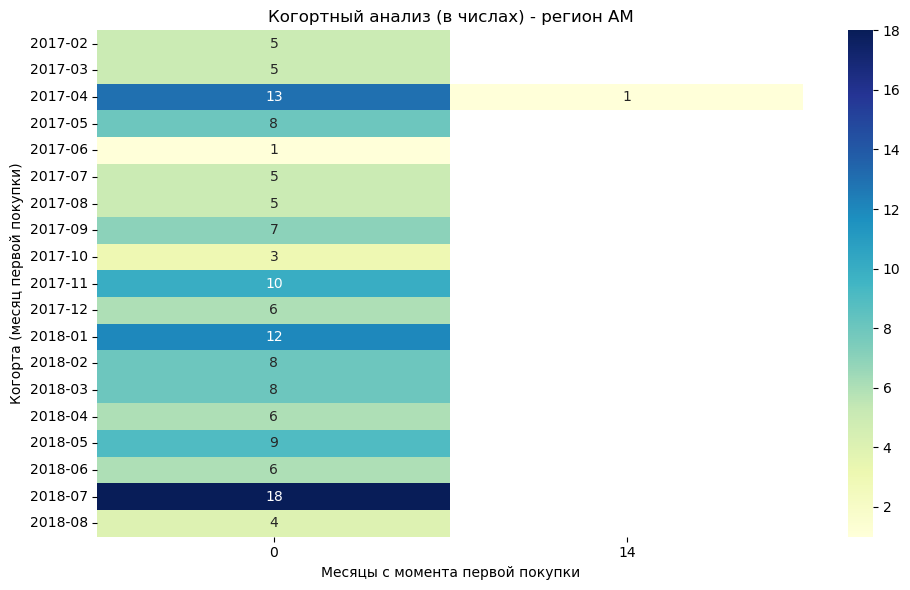

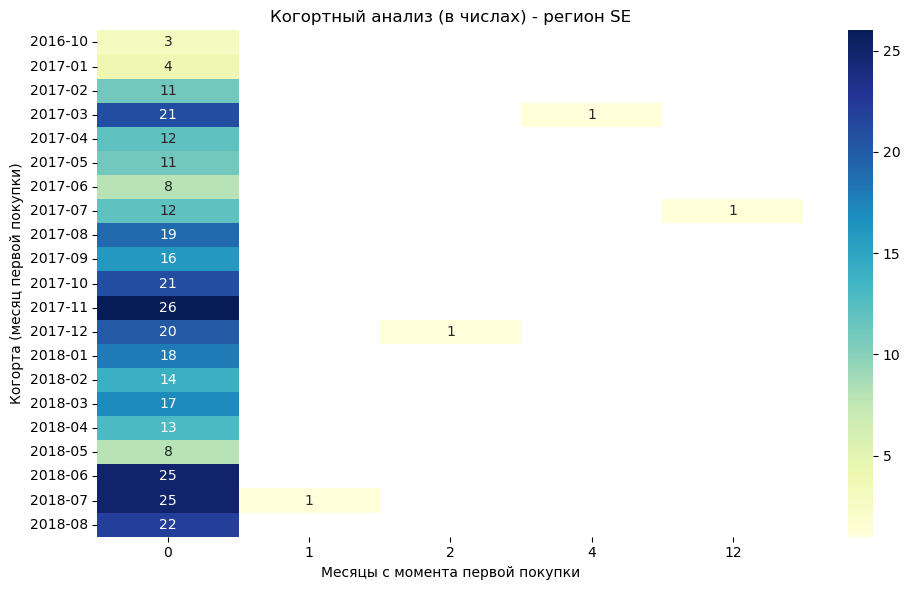

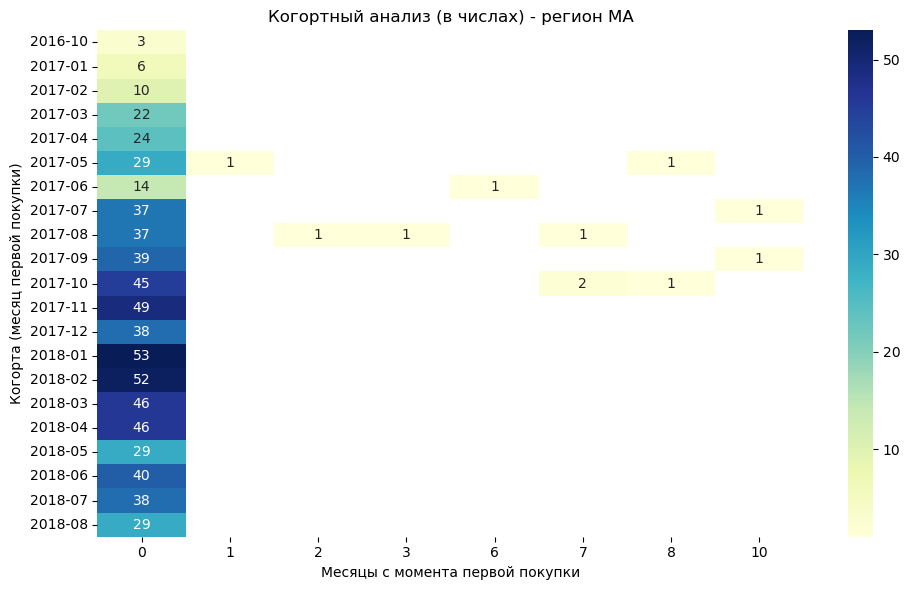

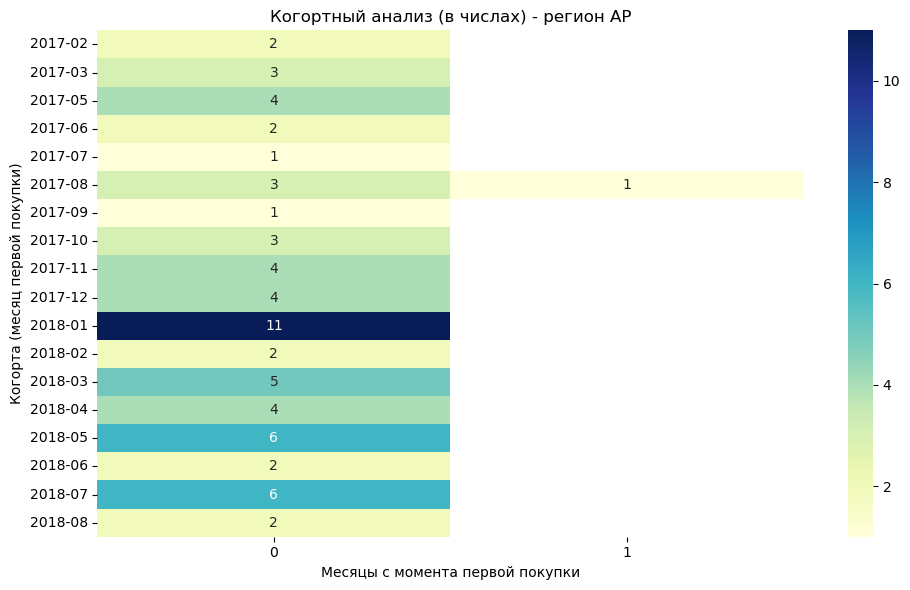

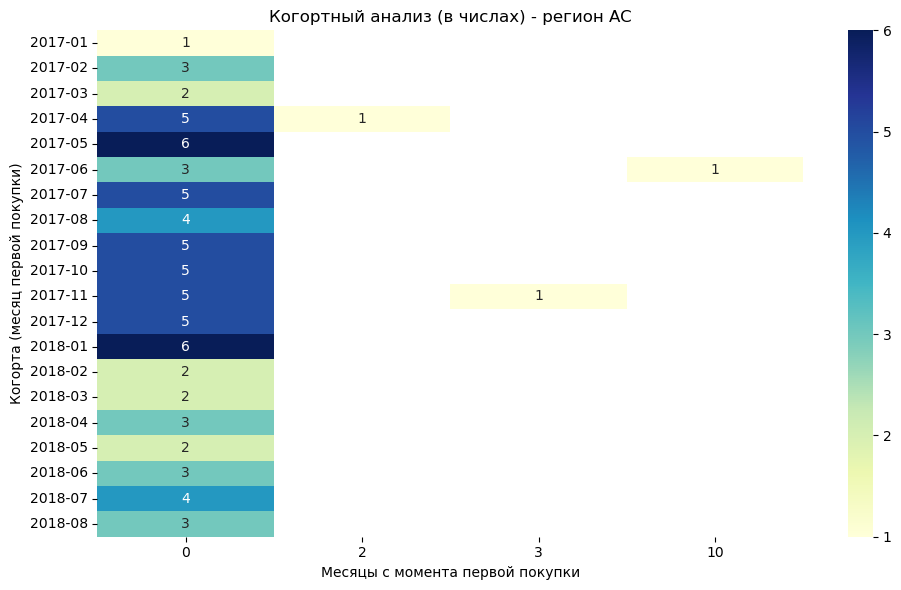

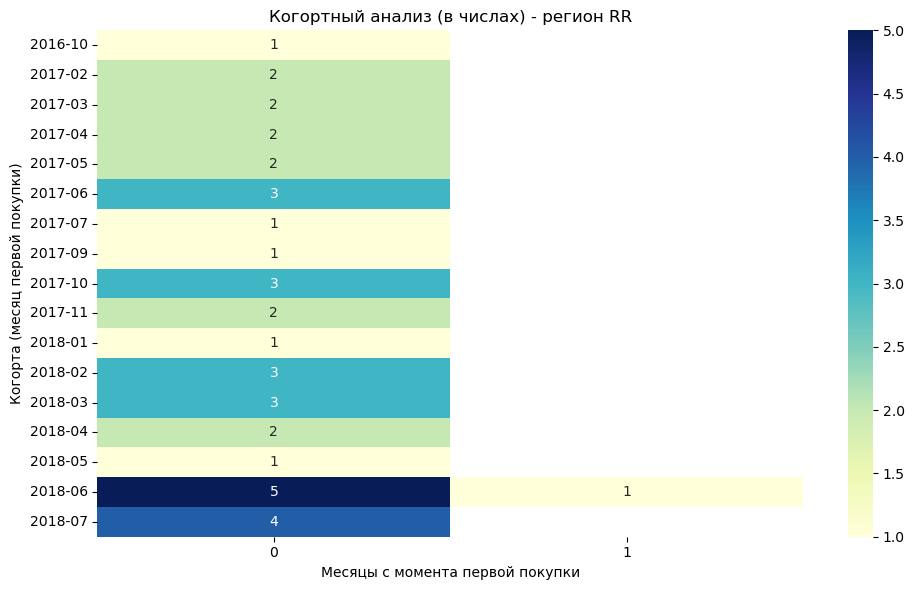

In [24]:
#группировка по региону
regional_cohort = data.groupby(['customer_state', 'cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()

#список всех регионов
state_list = data['customer_state'].unique()

for state in state_list:
    cohort_state = regional_cohort[regional_cohort['customer_state'] == state]
    cohort_pivot = cohort_state.pivot(index='cohort_month', columns='cohort_index', values='customer_unique_id')

    if cohort_pivot.empty or cohort_pivot.shape[1] < 2:
        continue

    #построение heatmap без нормализации - просто количество покупателей
    plt.figure(figsize=(10, 6))
    sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
    plt.title(f'Когортный анализ (в числах) - регион {state}')
    plt.ylabel('Когорта (месяц первой покупки)')
    plt.xlabel('Месяцы с момента первой покупки')
    plt.tight_layout()
    plt.savefig(f'./product/cohort/month/cohort_churn_by_month_{state}.png')
    plt.show()